# Install Necessary Libraries

In [1]:
!pip install tensorflow keras numpy matplotlib seaborn scikit-learn jupyter


# Importing Libraries and Loading the Dataset

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Set the directory paths
train_dir = 'C:/Users/Admin/Desktop/Wali_Patel_Project/resized_224/train'
val_dir = 'C:/Users/Admin/Desktop/Wali_Patel_Project/resized_224/validation'
test_dir = 'C:/Users/Admin/Desktop/Wali_Patel_Project/resized_224/test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224),
                                                batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224),
                                                  batch_size=32, class_mode='binary', shuffle=False)



Found 1600 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Building the CNN Model

In [3]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model architecture
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

# Training the Model

In [4]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator, 
                    callbacks=[early_stopping])


Epoch 1/20


50/50 [==============================] - 68s 1s/step - loss: 0.7737 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4818
Epoch 2/20
50/50 [==============================] - 58s 1s/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5026
Epoch 3/20
50/50 [==============================] - 58s 1s/step - loss: 0.6942 - accuracy: 0.5169 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 4/20
50/50 [==============================] - 54s 1s/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 5/20
50/50 [==============================] - 55s 1s/step - loss: 0.6933 - accuracy: 0.5113 - val_loss: 0.6931 - val_accuracy: 0.4896
Epoch 6/20
50/50 [==============================] - 55s 1s/step - loss: 0.6937 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 7/20
50/50 [==============================] - 55s 1s/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.4818
Epoch 8/20
50/50 [

# Evaluating the Model

7/7 [==============================] - 2s 214ms/step - loss: 0.6934 - accuracy: 0.4400
Test Accuracy: 44.00%
7/7 [==============================] - 2s 164ms/step
Classification Report:
               precision    recall  f1-score   support

Cardiomegaly       0.46      0.65      0.54       100
  No Finding       0.40      0.23      0.29       100

    accuracy                           0.44       200
   macro avg       0.43      0.44      0.41       200
weighted avg       0.43      0.44      0.41       200



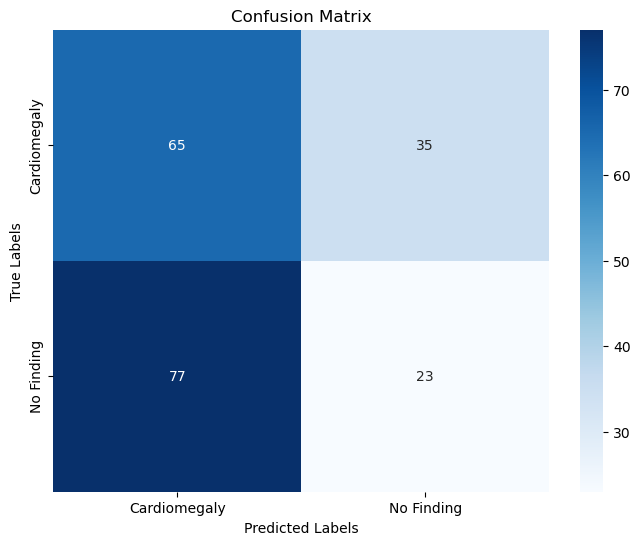

In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predict the test set
predictions = model.predict(test_generator)
predictions = np.round(predictions).astype(int).flatten()

# True labels
true_labels = test_generator.classes

# Classification report
report = classification_report(true_labels, predictions, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Saving the Model

In [6]:
# Save the trained model
model.save('cardiomegaly_detection_model.h5')


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualizing Training History

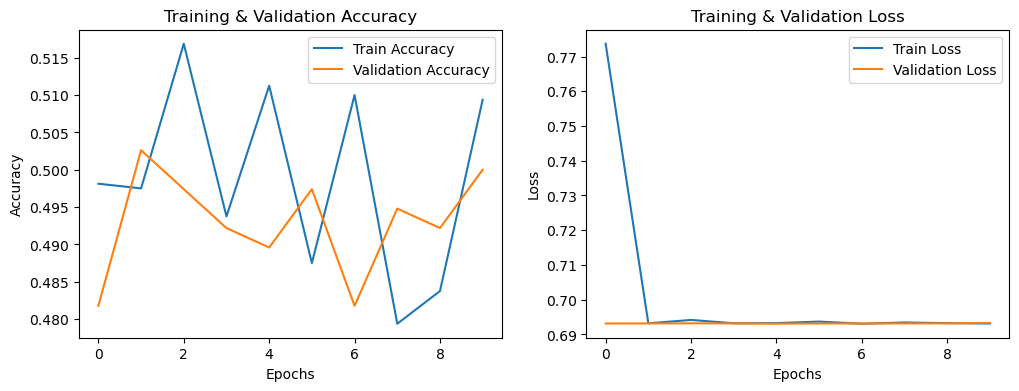

In [7]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


# Loading the Trained Model

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('cardiomegaly_detection_model.h5')


# Preprocessing the New Image

In [9]:
def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Reshape the array (add an extra dimension)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the pixel values to be between 0 and 1
    img_array /= 255.0
    
    return img_array


# Making Predictions

In [10]:
def predict_image(model, img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Predict using the model
    prediction = model.predict(img_array)
    
    # Interpret the result
    if prediction[0][0] > 0.5:
        result = "Cardiomegaly Detected"
    else:
        result = "No Cardiomegaly Detected"
    
    return result


# Testing on a New X-ray Image

1/1 [==============================] - 0s 43ms/step
Prediction: Cardiomegaly Detected


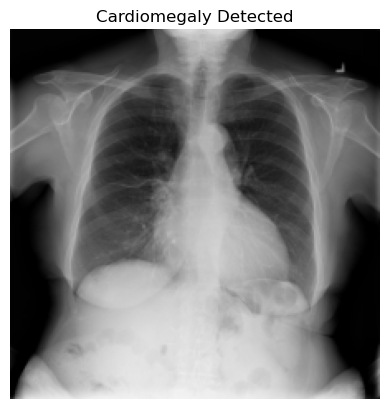

In [12]:
# Path to the new X-ray image
img_path = 'C:/Users/Admin/Desktop/Wali_Patel_Project/img2.png'

# Predict and display the result
result = predict_image(model, img_path)
print(f"Prediction: {result}")

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(result)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 38ms/step
Prediction: No Cardiomegaly Detected


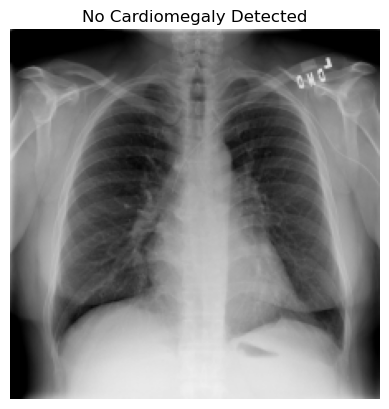

In [13]:
# Path to the new X-ray image
img_path = 'C:/Users/Admin/Desktop/Wali_Patel_Project/img1.png'

# Predict and display the result
result = predict_image(model, img_path)
print(f"Prediction: {result}")

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(result)
plt.axis('off')
plt.show()
